## Central Limit Theorem and Normality Test Demonstration
In this notebook, I demonstrate the consequence of central limit theorem for several distributions. According to Wikipedia, 

"In probability theory, the central limit theorem (CLT) establishes that, in many situations, when independent random variables are summed up, their properly normalized sum tends toward a normal distribution even if the original variables themselves are not normally distributed."

We will check the normality of the sampled-mean distribution with Kolmogorov-Smirnov test

In [46]:
## Load lib and package
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

np.random.seed(42)
## Generate distribution with N points
N = 10000
uniform = np.random.uniform(0,1,N)
binom = np.random.binomial(12,0.6,N)
exponential = np.random.exponential(size=N)

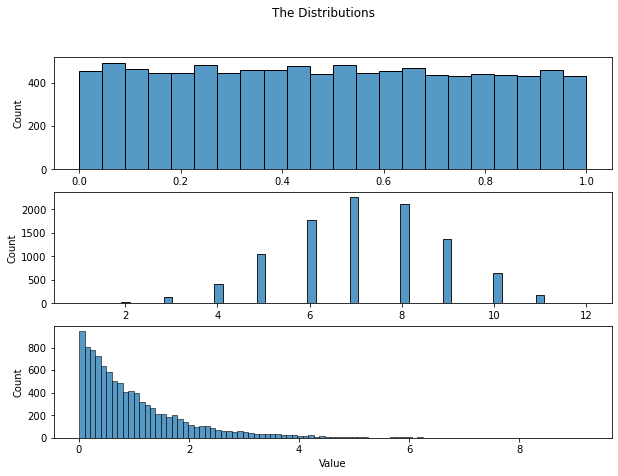

In [47]:
## Visualize the distribution
fig, ax = plt.subplots(3, figsize=(10,7))
fig.suptitle('The Distributions')

sns.histplot(ax=ax[0],data=uniform)
sns.histplot(ax=ax[1],data=binom)
sns.histplot(ax=ax[2],data=exponential)

plt.xlabel("Value")
plt.show()

In [48]:
## Sampling for the means from the generated distribution N times with n sample size
N = 10000
n = 1000
means_binom = []
for i in range(N):
    means_binom.append(np.random.choice(binom, size=n).mean())

means_uniform = []
for i in range(N):
    means_uniform.append(np.random.choice(uniform, size=n).mean())

means_exponential = []
for i in range(N):
    means_exponential.append(np.random.choice(exponential, size=n).mean())

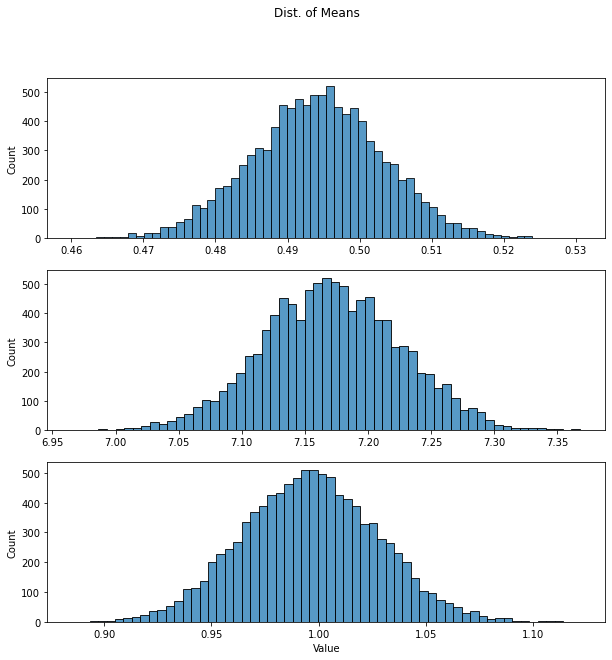

In [49]:
## Visualize the sampled means
fig, ax = plt.subplots(3, figsize=(10,10))
fig.suptitle("Dist. of Means")

sns.histplot(ax=ax[0], data=means_uniform)
sns.histplot(ax=ax[1], data=means_binom)
sns.histplot(ax=ax[2], data=means_exponential)

plt.xlabel('Value')
plt.show()

In [50]:
## Notice that the shape of the distributions is similar to the normal dist. But we will do normality test to ensure our result
## Let's test the normality of our sampled mean distribution to see if they are statistically normal dist.
## We are going to use Kolmogorov-Smirnov test.
## But, we need to scale the distribution first
array_means_uniform = np.array(means_uniform)
array_means_binom = np.array(means_binom)
array_means_exponential = np.array(means_exponential)

scaled_uniform = (array_means_uniform - array_means_uniform.mean())/array_means_uniform.std()
scaled_binom = (array_means_binom - array_means_binom.mean())/array_means_binom.std()
scaled_exponential = (array_means_exponential - array_means_exponential.mean())/array_means_exponential.std()

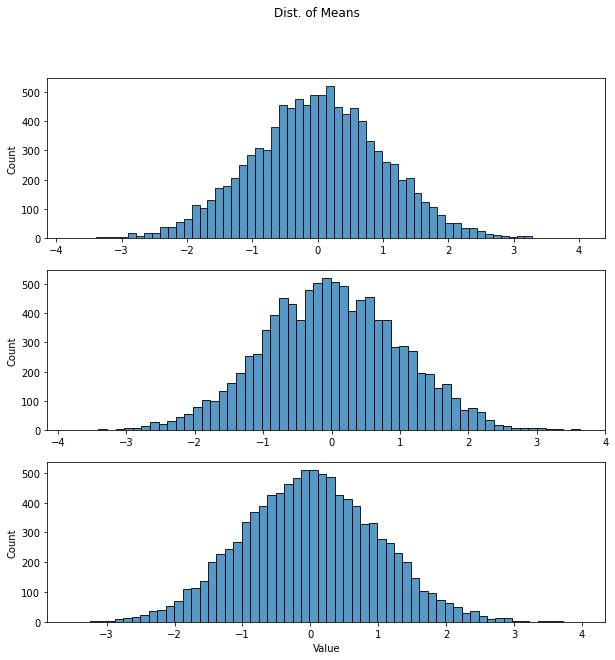

In [51]:
## Visualize the scaled sampled-mean
fig, ax = plt.subplots(3, figsize=(10,10))
fig.suptitle("Dist. of Means")

sns.histplot(ax=ax[0], data=scaled_uniform)
sns.histplot(ax=ax[1], data=scaled_binom)
sns.histplot(ax=ax[2], data=scaled_exponential)

plt.xlabel('Value')
plt.show()

In [52]:
print("KS Test for uniform-origin dist.",stats.kstest(scaled_uniform, 'norm'))
print("KS Test for binomial-origin dist.",stats.kstest(scaled_binom, 'norm'))
print("KS Test for exponential-origin dist.",stats.kstest(scaled_exponential, 'norm'))

KS Test for uniform-origin dist. KstestResult(statistic=0.007903787561898301, pvalue=0.5571478756809596)
KS Test for binomial-origin dist. KstestResult(statistic=0.011356221534498667, pvalue=0.15044739968053333)
KS Test for exponential-origin dist. KstestResult(statistic=0.006411751577737879, pvalue=0.8030236998719696)


## Comment
Note that several distributions that are generated above have the same shape of sampled-mean distribution that is a normal distribution. We also have p-value > 0.05 and fail to reject the null hypothesis that every sampled-mean distributions are no statistically different from normal distribution. Hence, we have demonstrated that the central limit theorem holds for the generated distributions

Smaller the n, smaller the p-value (assuming constant N). Try to play around with N and n for more interesing stuff